# 🌎💧 O Desafio dos Recursos Hídricos e Produtividade na Amazônia
> **📓 Notebook:** Análise Climática, Socioeconômica e de Segurança Alimentar  
> **👤 Autor:** <seu nome> | 📅 **Data:** <AAAA-MM-DD> | 🔗 **Repositório:** <link Git/GitHub>

---

### 1️⃣ | Contexto
A região amazônica enfrenta eventos climáticos extremos (🌧️ estiagens prolongadas e 🌊 enchentes severas) que alteram o regime hídrico, impactando:
- 💧 **Qualidade e disponibilidade de água** para consumo, irrigação e uso doméstico.  
- 🌽 **Produtividade agrícola** de comunidades ribeirinhas/agricultores familiares.  
- 🏥 **Saúde pública**, via aumento de doenças transmitidas por água contaminada.  

Este estudo integra **duas bases de dados** para entender **????**

como esses fatores se relacionam com a **segurança alimentar** das comunidades locais.

---

### 🎯 2 | Objetivos
1. 🔍 **Definir o problema central** com base nos dados.  
2. 🧼 **Limpar e preparar** as bases: deduplicar, padronizar, tratar ausentes, ajustar datas.  
3. 📊 Realizar **Análise Exploratória de Dados (EDA)**:  
   - Distribuições, correlações, sazonalidades, impactos.  
4. 🧾 **Comunicar os achados** com gráficos, tabelas e uma narrativa clara.

---

### 🗃️ 3 | Descrição dos Dados

### 🌦️ 3.1 Base Climática
| Variável | Tipo | Faixa | Descrição |
|----------|------|-------|-----------|
| 📅 `data` | datetime | — | Data do registro |
| 🌧️ `chuvas_previstas_mm` | float | 0–200 | Precipitação prevista (mm) |
| 🌧️ `chuvas_reais_mm` | float | 0–200 | Precipitação medida (mm) |
| 🌡️ `temperatura_media_C` | float | 20–35 °C | Temperatura média diária |
| ⚠️ `variacao_climatica` | string | sim/nao | Evento climático incomum |
| 🌱 `indice_umidade_solo` | float | 10–90 % | Umidade do solo |

### 🧑‍🌾 3.2 Base Socioeconômica
| Variável | Tipo | Faixa | Descrição |
|----------|------|-------|-----------|
| 📅 `data` | datetime | — | Data do registro |
| 🌾 `volume_producao_tons` | float | 0.5–20 | Produção agrícola (toneladas) |
| 🤒 `incidencia_doencas` | int | λ≈2 | Casos de doenças hídricas |
| 🚰 `acesso_agua_potavel` | string | sim/nao | Acesso à água tratada |
| 🍽️ `indicador_seguranca_alimentar` | float | 0–100 | Índice de segurança alimentar |

---
### ⚙️ 4 | Configuração do Ambiente

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.ticker import MultipleLocator
import time
import matplotlib.ticker as ticker
inicio = time.time()


plt.rcParams["figure.dpi"] = 120
sns.set_style("whitegrid")
pd.set_option('display.width',None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_colwidth',None)

warnings.filterwarnings("ignore", category=FutureWarning)

---
### 📥 5 | Carregamento dos Dados

In [2]:
data_dir='/home/akel/PycharmProjects/I2A2/data/'
dfc = pd.read_csv(data_dir+'base_climatica.csv')
dfs = pd.read_csv(data_dir+'base_socioeconomica.csv')
display(dfc.head(10))
dfs.head(10)

,data,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo
0,2025-01-01,109.8,110.0,34.7,sim,45.9
1,2025-01-02,143.0,178.7,27.2,nao,34.4
2,2025-01-03,120.6,123.1,27.5,sim,77.1
3,2025-01-04,109.0,117.0,29.6,nao,29.0
4,2025-03-28,104.6,91.7,31.4,nao,45.4
5,2025-01-06,129.2,102.2,22.1,não,85.4
6,2025-01-07,87.5,62.1,32.3,nao,60.7
7,2025-01-08,178.4,197.8,22.8,nao,79.4
8,2025-01-09,192.7,169.2,27.7,sim,85.2
9,2025-01-10,76.7,115.6,23.4,sim,70.1


,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
0,2025-01-01,8.63,0.0,não,45.7
1,2025-01-02,1000.00,200.0,não,13.8
2,2025-01-03,0.50,0.0,não,1.1
3,2025-01-04,6.40,2.0,Sim,75.8
4,2025-01-05,3.36,2.0,não,32.0
5,2025-01-06,2.30,3.0,não,98.4
6,2025-01-07,4.13,0.0,sim,22.0
7,2025-01-08,7.24,3.0,não,33.9
8,2025-01-09,8.24,3.0,Sim,52.4
9,2025-01-10,11.01,0.0,nao,75.5


---
### 🧹 6 | Limpeza & Preparação

In [3]:
data_dir='/home/akel/PycharmProjects/I2A2/data/'
dfc = pd.read_csv(data_dir+'base_climatica.csv')
dfs = pd.read_csv(data_dir+'base_socioeconomica.csv')

# 1-ordenando datas

dfc['data'] = pd.to_datetime(dfc['data'])
dfs['data'] = pd.to_datetime(dfs['data'])

dfc.sort_values(by='data', inplace=True)
dfs.sort_values(by='data', inplace=True)

# 2-remover linhas duplicadas
dfc.drop_duplicates(inplace=True)
dfs.drop_duplicates(inplace=True)

# 3- Padronização categóricas sim/nao -> 1/0
dfc['variacao_climatica']=dfc['variacao_climatica'].str.lower().map({'sim':1, 'não':0, 'nao':0})
dfs['acesso_agua_potavel']=dfs['acesso_agua_potavel'].str.lower().map({'sim':1, 'não':0, 'nao':0})

# 5. Garantir apenas valores numéricos positivos(assumir que valores negativos são erros de digitação).
num_dfc_p=dfc.select_dtypes(include=np.number).abs()
num_dfs_p=dfs.select_dtypes(include=np.number).abs()

dfc[num_dfc_p.columns] = num_dfc_p
dfs[num_dfs_p.columns] = num_dfs_p

dfc.reset_index(drop=True, inplace=True)
dfs.reset_index(drop=True, inplace=True)


# #FOCAR NAS DATAS COMUNS (abordagem mais conservadora)
# datas_comuns = pd.Index(dfc['data']).intersection(dfs['data'])
# dfc1 = dfc[dfc['data'].isin(datas_comuns)].copy()
# dfs1 = dfs[dfs['data'].isin(datas_comuns)].copy()

# merge dataset
df_mrg= pd.merge(
    dfc,
    dfs,
    on='data',                 # chave de junção
    how='inner',               # garante apenas datas presentes nos dois
    suffixes=('_clima', '_socio')  # evita nomes duplicados
).sort_values('data').reset_index(drop=True)



### 🔎 7 | Análise exploratoria dos dados - Parte 1
#### 7.1 boxplots & outliers
* **Base Climática**


In [4]:
#função para remoção de outliers
def clean_outliers(df, z_threshold=3, iqr_factor=1.5):
    """
    Identifica e remove outliers de um DataFrame  usando múltiplos métodos.
    
    Parâmetros:
    - df: DataFrame com dados climáticos
    - z_threshold: Limiar para o método Z-score (padrão: 3)
    - iqr_factor: Fator para o método IQR (padrão: 1.5)
    
    Retorna:
    - DataFrame limpo sem outliers
    - DataFrame com outliers removidos
    """

    # Cópia do DataFrame original
    df_clean = df.copy()
 
    # Identificação de outliers para cada coluna numérica
    numeric_cols =df.select_dtypes(include=np.floating).columns
    
    outliers_mask = pd.DataFrame(index=df.index, columns=numeric_cols)
    
    for col in numeric_cols:
        # Método Z-score
        z_scores = np.abs(stats.zscore(df_clean[col]))
        z_outliers = z_scores > z_threshold
        
        # Método IQR
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = (df_clean[col] < (Q1 - iqr_factor * IQR)) | (df_clean[col] > (Q3 + iqr_factor * IQR))
        
        # Combina os dois métodos
        outliers_mask[col] = z_outliers | iqr_outliers
    
    # 3. Marcar linhas com outliers em múltiplas colunas
    total_outliers = outliers_mask.sum(axis=1)
    rows_to_remove = total_outliers[total_outliers >= 2].index  # Remove se tiver outlier em ≥2 colunas
    
    # 4. Criar DataFrames resultantes
    df_outliers_removed = df_clean.drop(rows_to_remove)
    df_only_outliers = df_clean.loc[rows_to_remove]
    
    return df_outliers_removed, df_only_outliers, numeric_cols 

In [5]:
# Aplicando a função
df3, df_outliers, numeric_cols  = clean_outliers(df_mrg)
# Resultados
print("=== DataFrame Limpo (sem outliers) ===")
print(f"Linhas originais: {len(df_mrg)}")
print(f"Linhas após limpeza: {len(df3)}")
print(f"Outliers removidos: {len(df_outliers)}\n")

=== DataFrame Limpo (sem outliers) ===
Linhas originais: 101
Linhas após limpeza: 95
Outliers removidos: 6



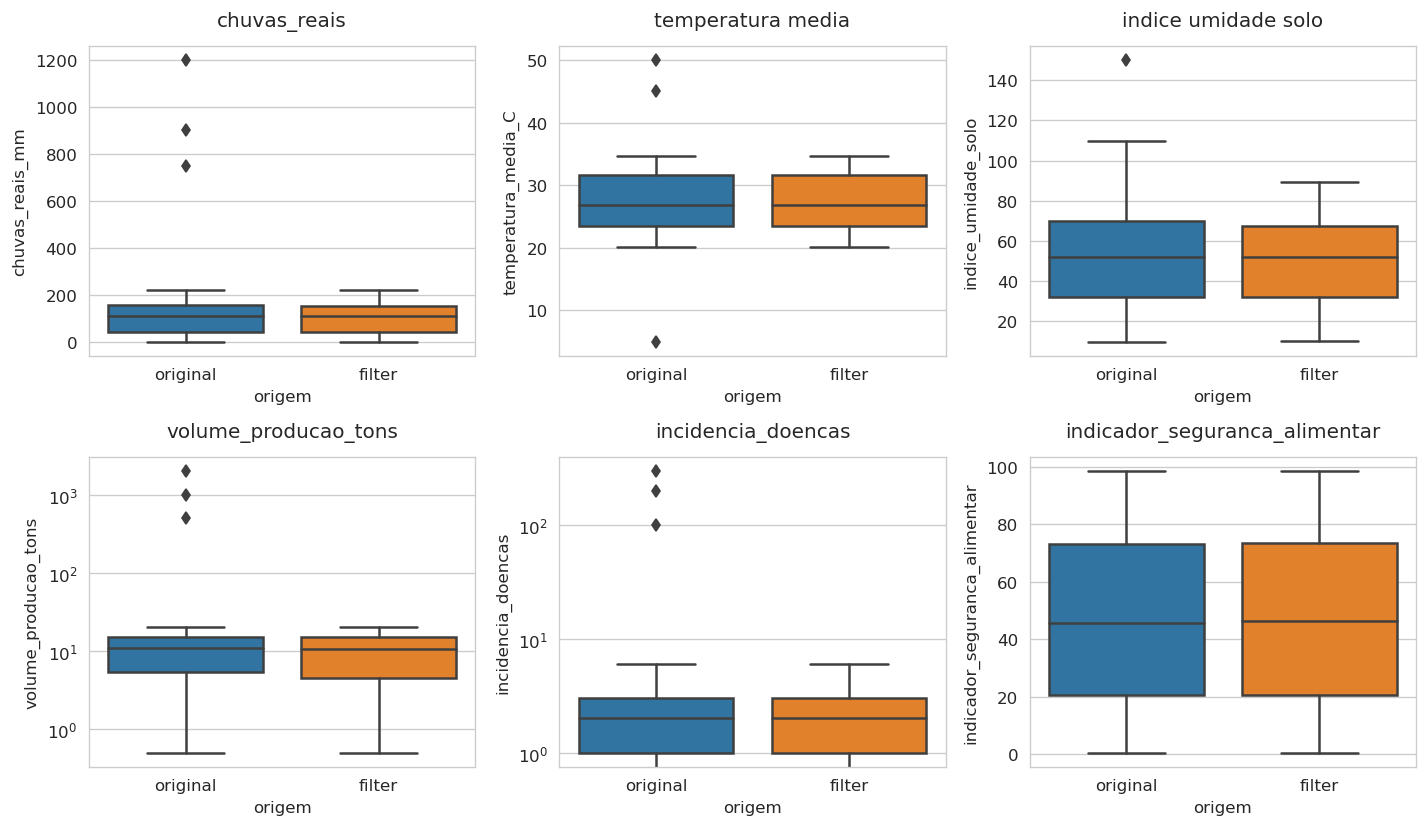

,chuvas_previstas_mm,chuvas_reais_mm,temperatura_media_C,variacao_climatica,indice_umidade_solo,data,volume_producao_tons,incidencia_doencas,acesso_agua_potavel,indicador_seguranca_alimentar
types,float64,float64,float64,int64,float64,NaN,NaN,NaN,NaN,NaN
nulls,0,3,2,0,3,NaN,NaN,NaN,NaN,NaN
count,95.0,92.0,93.0,95.0,92.0,95,90.000000,90.000000,95.000000,95.000000
mean,100.634737,104.369565,27.188172,0.494737,50.940217,2025-03-02 22:13:53.684210432,10.093667,1.900000,0.463158,46.991579
min,0.9,0.5,20.2,0.0,10.2,2025-01-01 00:00:00,0.500000,0.000000,0.000000,0.500000
25%,46.75,42.275,23.5,0.0,32.225,2025-01-29 12:00:00,4.525000,1.000000,0.000000,20.700000
50%,109.8,110.0,26.9,0.0,52.0,2025-03-03 00:00:00,10.660000,2.000000,0.000000,46.400000
75%,151.75,152.55,31.6,1.0,67.4,2025-04-03 12:00:00,15.012500,3.000000,1.000000,73.650000
max,197.7,219.2,34.7,1.0,89.6,2025-04-29 00:00:00,19.950000,6.000000,1.000000,98.600000
std,59.858398,61.996827,4.405304,0.502625,23.380795,NaN,5.948907,1.469159,0.501286,28.601245


In [6]:

df_mrg['origem'] = 'original'
df3['origem'] = 'filter'

# Concatenar os DataFrames
dfx = pd.concat([df_mrg, df3])

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
sns.boxplot(data=dfx,x='origem',y='chuvas_reais_mm',ax=axs[0,0])
axs[0,0].set_title("chuvas_reais", pad=12)

sns.boxplot(data=dfx,x='origem',y='temperatura_media_C',ax=axs[0,1])
axs[0,1].set_title("temperatura media", pad=12)

sns.boxplot(data=dfx,x='origem',y='indice_umidade_solo',ax=axs[0,2])
axs[0,2].set_title("indice umidade solo", pad=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])

sns.boxplot(data=dfx,x='origem',y='volume_producao_tons',ax=axs[1,0])
axs[1,0].set_title("volume_producao_tons", pad=12)
axs[1,0].set_yscale('log')

sns.boxplot(data=dfx,x='origem',y='incidencia_doencas',ax=axs[1,1])
axs[1,1].set_title("incidencia_doencas", pad=12)
axs[1,1].set_yscale('log')

sns.boxplot(data=dfx,x='origem',y='indicador_seguranca_alimentar',ax=axs[1,2])
axs[1,2].set_title("indicador_seguranca_alimentar", pad=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()

plt.show()

nulos = pd.DataFrame(df3.iloc[:,1:6].isnull().sum()).T
nulos.index = ['nulls']
tipos = pd.DataFrame(df3.iloc[:,1:6].dtypes).T
tipos.index = ['types']

descricao_full = pd.concat([tipos, nulos,df3.describe()])
descricao_full

### Series temporais

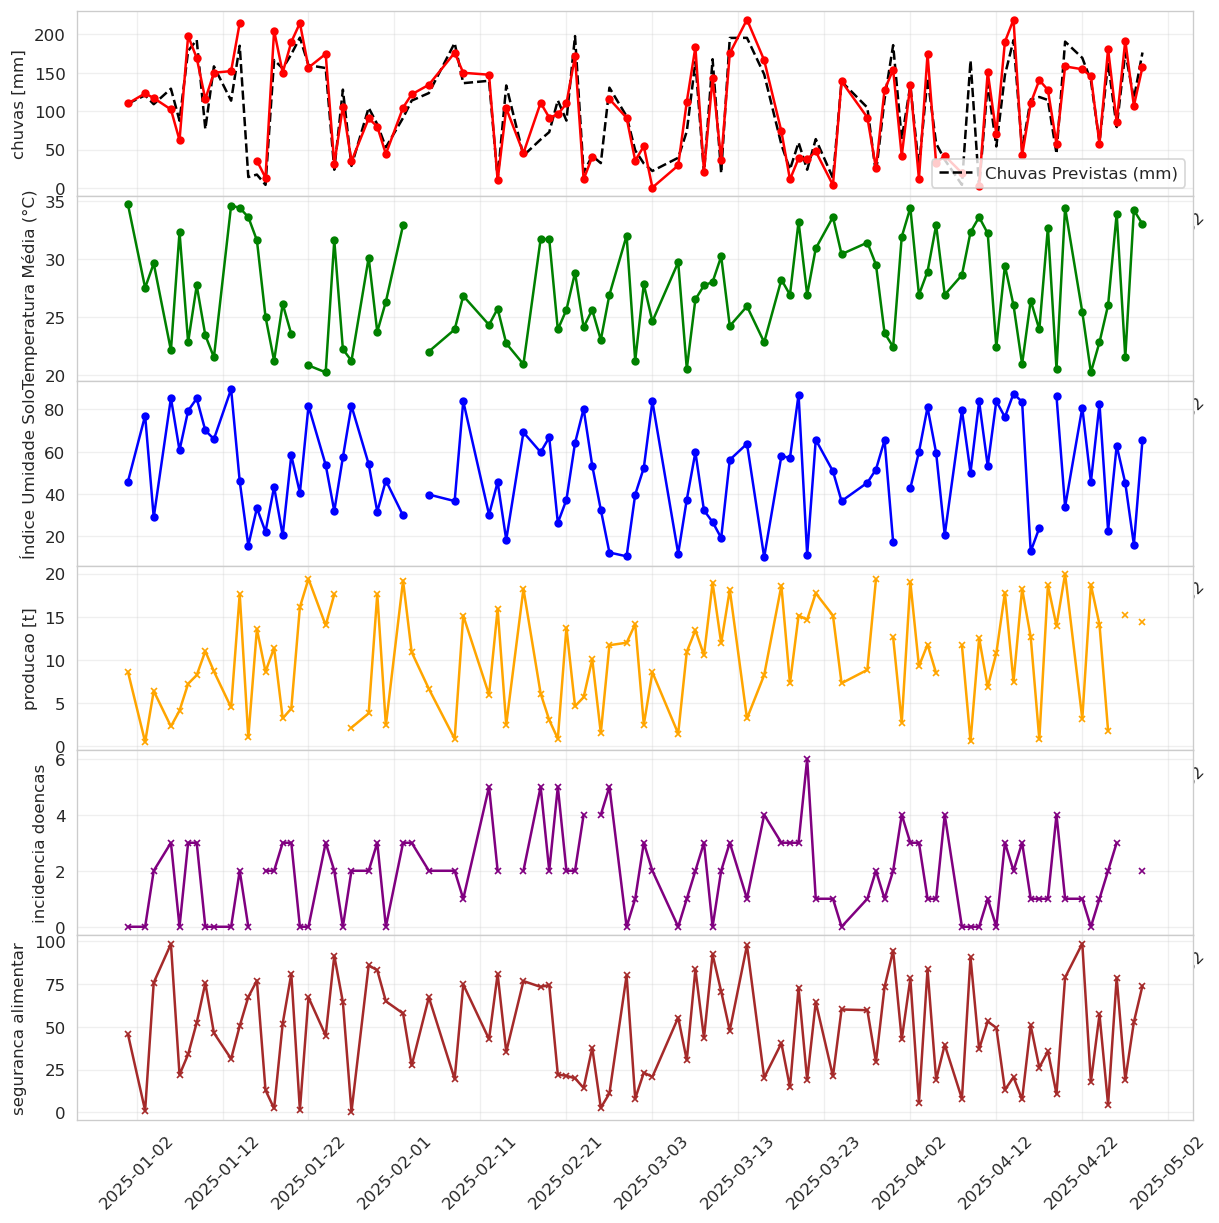

In [7]:
# Criar figura e subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 12))  
fig.subplots_adjust(hspace=0)

# Gráfico 1: Chuvas Previstas
axs[0].plot(df3['data'].values, df3['chuvas_previstas_mm'].values, 
         'k--', markersize=4, label='Chuvas Previstas (mm)')
axs[0].plot(df3['data'].values, df3['chuvas_reais_mm'].values, 
         'r-', marker='o', markersize=4)
axs[0].set_ylabel('chuvas [mm]')
axs[0].grid(True, alpha=0.3)
axs[0].legend(loc='lower right')

# Formatar o eixo x para mostrar ticks de 10 em 10 dias
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Temperatura Média
axs[1].plot(df3['data'].values, df3['temperatura_media_C'].values,
         'g-', marker='o', markersize=4, label='Temperatura Média (°C)')

axs[1].set_ylabel('Temperatura Média (°C)')
axs[1].grid(True, alpha=0.3)
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[1].tick_params(axis='x', rotation=45)


# Gráfico 3: Índice de Umidade do Solo
axs[2].plot(df3['data'].values, df3['indice_umidade_solo'].values,
         'b-', marker='o', markersize=4, label='Índice Umidade Solo')
axs[2].set_ylabel('Índice Umidade Solo')
axs[2].set_xlabel('Data')
axs[2].grid(True, alpha=0.3)
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[2].tick_params(axis='x', rotation=45)

#volume_producao_tons	incidencia_doencas	acesso_agua_potavel	indicador_seguranca_alimentar

# Gráfico 4: produção toneladas
axs[3].plot(df3['data'].values, df3['volume_producao_tons'].values, 
         'orange', marker='x',markersize=4, label='volume_producao_tons')
axs[3].set_ylabel('producao [t]')
axs[3].grid(True, alpha=0.3)
axs[3].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[3].tick_params(axis='x', rotation=45)

# Gráfico 5: produção toneladas
axs[4].plot(df3['data'].values, df3['incidencia_doencas'].values, 
         'purple', marker='x',markersize=4, label='incidencia_doencas')
axs[4].set_ylabel('incidencia doencas')
axs[4].grid(True, alpha=0.3)
axs[4].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[4].tick_params(axis='x', rotation=45)

# Gráfico 5: produção toneladas
axs[5].plot(df3['data'].values, df3['indicador_seguranca_alimentar'].values, 
         'brown', marker='x',markersize=4, label='indicador_seguranca_alimentar')
axs[5].set_ylabel('seguranca alimentar')
axs[5].grid(True, alpha=0.3)
axs[5].xaxis.set_major_locator(ticker.MultipleLocator(10))
axs[5].tick_params(axis='x', rotation=45)

plt.show()


In [8]:
fim = time.time()
print(fim - inicio)

3.4271531105041504
